# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_btc = 1.2

my_eth = 2.4



In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
requests.get(btc_url)


<Response [200]>

In [6]:
requests.get(eth_url)

<Response [200]>

In [7]:
response_data = requests.get(btc_url)
response_content = response_data.content
print(response_content)

b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 18526800,\n\t\t\t"total_supply": 18526800,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 13022.6800000000000000,\n\t\t\t\t\t"volume_24h": 18989192010,\n\t\t\t\t\t"market_cap": 241326618199,\n\t\t\t\t\t"percentage_change_1h": 0.0517825292052099,\n\t\t\t\t\t"percentage_change_24h": -0.6360978794408720,\n\t\t\t\t\t"percentage_change_7d": 14.5776148397806000,\n\t\t\t\t\t"percent_change_1h": 0.0517825292052099,\n\t\t\t\t\t"percent_change_24h": -0.6360978794408720,\n\t\t\t\t\t"percent_change_7d": 14.5776148397806000\n\t\t\t\t},\n\t\t\t\t"CAD": {\n\t\t\t\t\t"price": 17096.174304,\n\t\t\t\t\t"volume_24h": 24929011270.728,\n\t\t\t\t\t"market_cap": 316813584371.647,\n\t\t\t\t\t"percent_change_1h": 0.0517825292052099,\n\t\t\t\t\t"percent_change_24h": -0.6360978794408720,\n\t\t\t\t\t

In [8]:
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
print(response_content_eth)

b'{\n\t"data": {\n\t\t"1027": {\n\t\t\t"id": 1027,\n\t\t\t"name": "Ethereum",\n\t\t\t"symbol": "ETH",\n\t\t\t"website_slug": "ethereum",\n\t\t\t"rank": 2,\n\t\t\t"circulating_supply": 113157861,\n\t\t\t"total_supply": 113157861,\n\t\t\t"max_supply": 0,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 406.2800000000000000,\n\t\t\t\t\t"volume_24h": 8150205320,\n\t\t\t\t\t"market_cap": 45985592949,\n\t\t\t\t\t"percentage_change_1h": 0.1433580935752480,\n\t\t\t\t\t"percentage_change_24h": -1.3793660687900400,\n\t\t\t\t\t"percentage_change_7d": 10.2065031099247000,\n\t\t\t\t\t"percent_change_1h": 0.1433580935752480,\n\t\t\t\t\t"percent_change_24h": -1.3793660687900400,\n\t\t\t\t\t"percent_change_7d": 10.2065031099247000\n\t\t\t\t},\n\t\t\t\t"CAD": {\n\t\t\t\t\t"price": 533.364384,\n\t\t\t\t\t"volume_24h": 10699589544.096,\n\t\t\t\t\t"market_cap": 60369886423.4472,\n\t\t\t\t\t"percent_change_1h": 0.1433580935752480,\n\t\t\t\t\t"percent_change_24h": -1.3793660687900400,\n\t\t\t\t\t"pe

In [9]:
import json

In [10]:
data = response_data.json()
print(data)

{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 18526800, 'total_supply': 18526800, 'max_supply': 21000000, 'quotes': {'USD': {'price': 13022.68, 'volume_24h': 18989192010, 'market_cap': 241326618199, 'percentage_change_1h': 0.0517825292052099, 'percentage_change_24h': -0.636097879440872, 'percentage_change_7d': 14.5776148397806, 'percent_change_1h': 0.0517825292052099, 'percent_change_24h': -0.636097879440872, 'percent_change_7d': 14.5776148397806}, 'CAD': {'price': 17096.174304, 'volume_24h': 24929011270.728, 'market_cap': 316813584371.647, 'percent_change_1h': 0.0517825292052099, 'percent_change_24h': -0.636097879440872, 'percent_change_7d': 14.5776148397806}}, 'last_updated': 1603669918}}, 'metadata': {'timestamp': 1603669918, 'num_cryptocurrencies': 1429, 'error': None}}


In [11]:
data_eth = response_data_eth.json()
print(data_eth)

{'data': {'1027': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'website_slug': 'ethereum', 'rank': 2, 'circulating_supply': 113157861, 'total_supply': 113157861, 'max_supply': 0, 'quotes': {'USD': {'price': 406.28, 'volume_24h': 8150205320, 'market_cap': 45985592949, 'percentage_change_1h': 0.143358093575248, 'percentage_change_24h': -1.37936606879004, 'percentage_change_7d': 10.2065031099247, 'percent_change_1h': 0.143358093575248, 'percent_change_24h': -1.37936606879004, 'percent_change_7d': 10.2065031099247}, 'CAD': {'price': 533.364384, 'volume_24h': 10699589544.096, 'market_cap': 60369886423.4472, 'percent_change_1h': 0.143358093575248, 'percent_change_24h': -1.37936606879004, 'percent_change_7d': 10.2065031099247}}, 'last_updated': 1603669924}}, 'metadata': {'timestamp': 1603669924, 'num_cryptocurrencies': 1429, 'error': None}}


In [12]:
print(json.dumps(data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18526800,
            "total_supply": 18526800,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 13022.68,
                    "volume_24h": 18989192010,
                    "market_cap": 241326618199,
                    "percentage_change_1h": 0.0517825292052099,
                    "percentage_change_24h": -0.636097879440872,
                    "percentage_change_7d": 14.5776148397806,
                    "percent_change_1h": 0.0517825292052099,
                    "percent_change_24h": -0.636097879440872,
                    "percent_change_7d": 14.5776148397806
                },
                "CAD": {
                    "price": 17096.174304,
                    "volume_24h": 24929011270.728,
               

In [13]:
print(json.dumps(data_eth, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 113157861,
            "total_supply": 113157861,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 406.28,
                    "volume_24h": 8150205320,
                    "market_cap": 45985592949,
                    "percentage_change_1h": 0.143358093575248,
                    "percentage_change_24h": -1.37936606879004,
                    "percentage_change_7d": 10.2065031099247,
                    "percent_change_1h": 0.143358093575248,
                    "percent_change_24h": -1.37936606879004,
                    "percent_change_7d": 10.2065031099247
                },
                "CAD": {
                    "price": 533.364384,
                    "volume_24h": 10699589544.096,
                    "m

In [14]:
btc_value = data["data"]["1"]["quotes"]["CAD"]["price"]


In [15]:
eth_value = data_eth["data"]["1027"]["quotes"]["CAD"]["price"]


In [16]:
# Fetch current BTC price

btc_value = data["data"]["1"]["quotes"]["CAD"]["price"]

# Fetch current ETH price

eth_value = data_eth["data"]["1027"]["quotes"]["CAD"]["price"]


# Compute current value of my crpto




my_btc_value = my_btc * btc_value

my_eth_value = my_eth* eth_value


my_crypto_value = my_btc_value + my_eth_value 

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $20515.41
The current value of your 2.4 ETH is $1280.07


In [17]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [18]:
# Current amount of shares

my_agg =  200

my_spy = 50



In [19]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object\

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")




In [20]:
# Format current date as ISO format

today = pd.Timestamp("2020-10-21", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG

df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame

df_portfolio


AGG                                       SPY  \
                             open    high     low    close   volume    open   
2020-10-21 00:00:00-04:00  117.59  117.64  117.48  117.515  2829309  343.33   

                                                             
                             high     low   close    volume  
2020-10-21 00:00:00-04:00  345.67  342.45  342.69  43419032

In [21]:
# Pick AGG and SPY close prices

agg_close_price = float(df_portfolio["AGG"]["close"])

spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.515
Current SPY closing price: $342.69


In [22]:
# Compute the current value of shares

my_agg_value = my_agg  * agg_close_price

my_spy_value = my_spy * spy_close_price

stock_savings = my_agg_value + my_spy_value 


# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17134.50
The current value of your 200 AGG shares is $23503.00


### Savings Health Analysis

In [23]:
# Set monthly household income

monthly_income = 12000

# Create savings DataFrame

df_savings = pd.DataFrame()

#df_savings = {"" : ["crypto", "shares" ], "amount" : [my_crypto_value, stock_savings]}

df_savings[""] = ["crypto", "shares" ]
df_savings["amount"] = [my_crypto_value, stock_savings]

df_savings = df_savings.set_index("")


# Display savings DataFrame
display(df_savings)

,amount
,
crypto,21795.483686
shares,40637.500000


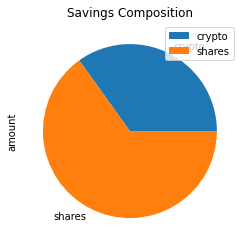

In [24]:
# Plot savings pie chart

df_savings.plot.pie(y="amount", title="Savings Composition")


In [25]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3


# Calculate total amount of savings

total_savings = my_crypto_value + stock_savings



# Validate saving health

if emergency_fund > total_savings:
        (print(f"The current value of your total savings is short by  ${emergency_fund - total_savings}"))
else:
    print("Congratulations on meeting your financial goal")


Congratulations on meeting your financial goal


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [26]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-12-22', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-22', tz='America/New_York').isoformat()

In [27]:
# Get 5 years' worth of historical data for SPY and AGG

tickers = ["SPY","AGG"]


api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open    high       low   close     volume   
2015-12-22 00:00:00-05:00  108.27  108.28  108.1200  108.19  4323053.0   
2015-12-23 00:00:00-05:00  108.01  108.19  108.0000  108.18  3399409.0   
2015-12-24 00:00:00-05:00  107.95  108.05  107.9200  108.01  1151867.0   
2015-12-28 00:00:00-05:00  108.03  108.13  107.9900  108.02  2446828.0   
2015-12-29 00:00:00-05:00  107.92  107.98  107.6201  107.73  2852314.0   

                              SPY                                    
                             open    high     low   close    volume  
2015-12-22 00:00:00-05:00  202.72  203.85  201.55  203.51  84529093  
2015-12-23 00:00:00-05:00  204.71  206.07  204.58  206.02  79877884  
2015-12-24 00:00:00-05:00  205.72  206.33  205.42  205.57  31975061  
2015-12-28 00:00:00-05:00  204.86  205.26  203.94  205.19  50363129  
2015-12-29 00:00:00-05:00  206.51  207.79  206.47  207.43  63699688

In [28]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_even_dist = MCSimulation(
    portfolio_data =  df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)



In [29]:
# Printing the simulation input data


MC_even_dist.portfolio_data.head()


AGG                                       \
                             open    high       low   close     volume   
2015-12-22 00:00:00-05:00  108.27  108.28  108.1200  108.19  4323053.0   
2015-12-23 00:00:00-05:00  108.01  108.19  108.0000  108.18  3399409.0   
2015-12-24 00:00:00-05:00  107.95  108.05  107.9200  108.01  1151867.0   
2015-12-28 00:00:00-05:00  108.03  108.13  107.9900  108.02  2446828.0   
2015-12-29 00:00:00-05:00  107.92  107.98  107.6201  107.73  2852314.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-12-22 00:00:00-05:00          NaN  202.72  203.85  201.55  203.51   
2015-12-23 00:00:00-05:00    -0.000092  204.71  206.07  204.58  206.02   
2015-12-24 00:00:00-05:00    -0.001571  205.72  206.33  205.42  205.57   
2015-12-28 00:00:00-05:00     0.000093  204.86  205.26  203.94  205.19   
2015-12-29 00:00:00-05:00    -0.002685  206.51  207.79  206.47  207.43   

                                                  
                             volume daily_return  
2015-12-22 00:00:00-05:00  84529093          NaN  
2015-12-23 00:00:00-05:00  79877884     0.012334  
2015-12-24 00:00:00-05:00  31975061    -0.002184  
2015-12-28 00:00:00-05:00  50363129    -0.001849  
2015-12-29 00:00:00-05:00  63699688     0.010917

In [30]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns


MC_even_dist.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999024,1.002175,0.994211,0.997814,0.999565,1.002026,1.008453,1.005372,0.993581,1.001742,...,1.001501,1.010473,0.990716,0.998500,0.992044,0.994494,0.994757,0.996188,1.007297,0.996819
2,0.997429,0.996930,0.994548,0.997439,0.992820,1.007648,1.013889,1.000072,0.996027,1.008862,...,0.996238,1.006907,0.998765,1.000248,0.997863,0.994181,0.987091,0.994405,1.011779,1.002629
3,0.998458,0.991496,0.993758,0.991819,0.991984,1.010024,1.012417,1.001835,1.004218,1.002691,...,0.997448,1.013003,1.001805,0.994515,0.988165,0.988929,0.981440,0.990772,1.013341,0.995704
4,1.003604,0.996093,1.000543,0.984556,0.995058,1.001730,1.007726,1.007232,0.999962,1.005759,...,1.000847,1.015300,1.001456,0.991227,0.980913,0.994826,0.980868,0.995994,1.014384,1.002330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.963187,5.721407,4.727892,5.496424,3.832764,2.627546,7.257678,5.947478,4.428218,5.864682,...,6.261926,7.516416,7.778447,4.058800,4.761654,3.792008,10.262831,4.115483,9.337708,7.120104
7557,8.965218,5.666765,4.711278,5.509610,3.848949,2.643628,7.166430,5.919448,4.450226,5.888296,...,6.270426,7.484837,7.758483,4.067182,4.758783,3.795632,10.223599,4.058055,9.352378,7.157319
7558,8.916433,5.650697,4.714377,5.503757,3.839835,2.618123,7.186591,5.941334,4.485026,5.917623,...,6.267132,7.519552,7.793508,4.046222,4.776522,3.822104,10.204282,4.067296,9.340227,7.154618
7559,8.970264,5.632254,4.708791,5.537784,3.855640,2.622130,7.132357,5.950927,4.494458,5.941421,...,6.222019,7.520337,7.775478,4.027456,4.780192,3.838366,10.199404,4.041558,9.294535,7.178800


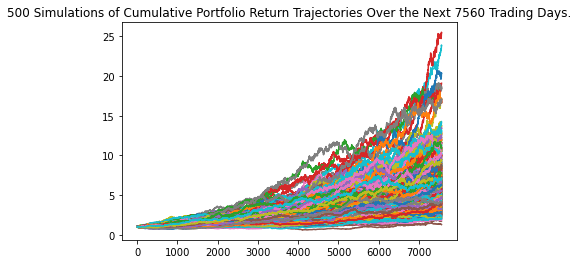

In [31]:
# Plot simulation outcomes


line_plot = MC_even_dist.plot_simulation()


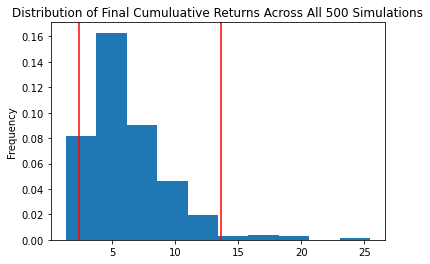

In [32]:
# Plot probability distribution and confidence intervals

dist_plot = MC_even_dist.plot_distribution()



### Retirement Analysis

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics


print(even_tbl)


count           500.000000
mean              6.303040
std               3.234292
min               1.291981
25%               4.023439
50%               5.550246
75%               7.670471
max              25.469046
95% CI Lower      2.342437
95% CI Upper     13.659413
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [34]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $46848.75 and $273188.25


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [35]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)




# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $70273.12 and $409782.38


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [36]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_even_dist_five = MCSimulation(
    portfolio_data =  df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)


MC_even_dist_five.portfolio_data.head()


AGG                                       \
                             open    high       low   close     volume   
2015-12-22 00:00:00-05:00  108.27  108.28  108.1200  108.19  4323053.0   
2015-12-23 00:00:00-05:00  108.01  108.19  108.0000  108.18  3399409.0   
2015-12-24 00:00:00-05:00  107.95  108.05  107.9200  108.01  1151867.0   
2015-12-28 00:00:00-05:00  108.03  108.13  107.9900  108.02  2446828.0   
2015-12-29 00:00:00-05:00  107.92  107.98  107.6201  107.73  2852314.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-12-22 00:00:00-05:00          NaN  202.72  203.85  201.55  203.51   
2015-12-23 00:00:00-05:00    -0.000092  204.71  206.07  204.58  206.02   
2015-12-24 00:00:00-05:00    -0.001571  205.72  206.33  205.42  205.57   
2015-12-28 00:00:00-05:00     0.000093  204.86  205.26  203.94  205.19   
2015-12-29 00:00:00-05:00    -0.002685  206.51  207.79  206.47  207.43   

                                                  
                             volume daily_return  
2015-12-22 00:00:00-05:00  84529093          NaN  
2015-12-23 00:00:00-05:00  79877884     0.012334  
2015-12-24 00:00:00-05:00  31975061    -0.002184  
2015-12-28 00:00:00-05:00  50363129    -0.001849  
2015-12-29 00:00:00-05:00  63699688     0.010917

In [37]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns



MC_even_dist_five.calc_cumulative_return()



Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002746,0.991581,0.995302,0.995532,0.989569,1.004313,1.003270,1.004135,1.000663,1.003865,...,1.002887,1.003811,0.996869,1.008193,1.001891,0.995364,1.000044,1.004129,1.004966,1.004603
2,1.011466,0.989765,0.990686,0.995673,0.985273,1.001307,0.999298,0.996666,1.006516,1.006082,...,1.007011,0.995171,0.997701,1.012020,1.004064,0.994457,1.003609,1.006154,1.002496,1.006644
3,1.009158,0.984934,0.980419,0.998482,0.987671,0.999836,1.007069,1.003920,1.007266,1.001456,...,1.004898,0.994932,1.002033,1.013744,0.995988,0.981790,0.999302,1.006005,0.999745,1.002654
4,1.009546,0.987693,0.985528,0.997105,0.989419,1.000978,1.010009,1.009854,1.007133,1.006056,...,1.002242,0.994488,1.003813,1.009083,0.995621,0.975402,1.000975,1.008280,1.005410,1.002501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.424103,0.845344,1.382612,0.963797,0.795808,2.109767,0.978893,1.057842,1.076166,1.029115,...,1.498462,1.692619,1.139553,1.243693,1.579394,1.021723,1.360585,1.608250,1.082049,1.931205
1257,1.427082,0.844343,1.371383,0.963198,0.803896,2.102189,0.983162,1.055708,1.083284,1.027528,...,1.479725,1.695230,1.131386,1.239835,1.571701,1.021346,1.355970,1.610217,1.097034,1.939933
1258,1.421919,0.847378,1.383275,0.956803,0.801245,2.104343,0.983889,1.055290,1.081710,1.026801,...,1.485866,1.688837,1.128395,1.232512,1.576454,1.024949,1.357328,1.601513,1.092980,1.936155
1259,1.430504,0.849468,1.377566,0.959781,0.802967,2.115986,0.988574,1.050812,1.077510,1.028990,...,1.486031,1.701461,1.123537,1.225476,1.575698,1.026608,1.374608,1.600688,1.092368,1.919227


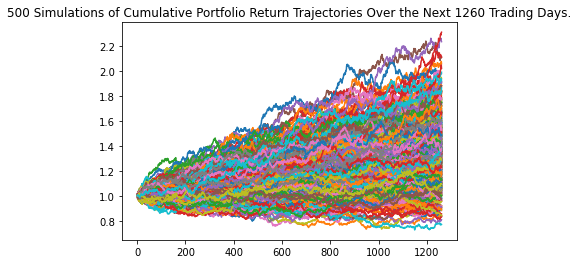

In [38]:
# Plot simulation outcomes
line_plot_five = MC_even_dist_five.plot_simulation()

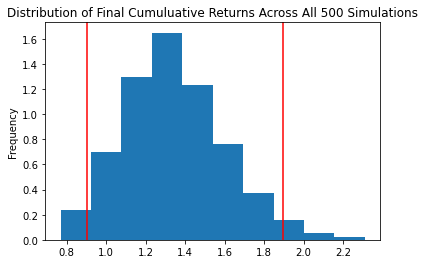

In [39]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_even_dist_five.plot_distribution()

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_five = MC_even_dist_five.summarize_cumulative_return()

# Print summary statistics

print(even_tbl_five)


count           500.000000
mean              1.348358
std               0.254888
min               0.769520
25%               1.167573
50%               1.334261
75%               1.504684
max               2.310513
95% CI Lower      0.904071
95% CI Upper      1.895631
Name: 1260, dtype: float64


In [41]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl_five[8]*20000,2)
ci_upper = round(even_tbl_five[9]*20000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $18081.42 and $37912.62


### Ten Years Retirement Option

In [42]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten = MCSimulation(
    portfolio_data =  df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)


MC_even_dist_ten.portfolio_data.head()




AGG                                       \
                             open    high       low   close     volume   
2015-12-22 00:00:00-05:00  108.27  108.28  108.1200  108.19  4323053.0   
2015-12-23 00:00:00-05:00  108.01  108.19  108.0000  108.18  3399409.0   
2015-12-24 00:00:00-05:00  107.95  108.05  107.9200  108.01  1151867.0   
2015-12-28 00:00:00-05:00  108.03  108.13  107.9900  108.02  2446828.0   
2015-12-29 00:00:00-05:00  107.92  107.98  107.6201  107.73  2852314.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-12-22 00:00:00-05:00          NaN  202.72  203.85  201.55  203.51   
2015-12-23 00:00:00-05:00    -0.000092  204.71  206.07  204.58  206.02   
2015-12-24 00:00:00-05:00    -0.001571  205.72  206.33  205.42  205.57   
2015-12-28 00:00:00-05:00     0.000093  204.86  205.26  203.94  205.19   
2015-12-29 00:00:00-05:00    -0.002685  206.51  207.79  206.47  207.43   

                                                  
                             volume daily_return  
2015-12-22 00:00:00-05:00  84529093          NaN  
2015-12-23 00:00:00-05:00  79877884     0.012334  
2015-12-24 00:00:00-05:00  31975061    -0.002184  
2015-12-28 00:00:00-05:00  50363129    -0.001849  
2015-12-29 00:00:00-05:00  63699688     0.010917

In [43]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns

MC_even_dist_ten.calc_cumulative_return()




Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996345,0.997269,0.998491,0.996282,1.000077,1.002492,0.999828,0.999703,1.005504,1.004639,...,0.999970,1.010968,1.001357,0.997697,0.991109,0.992042,1.008584,1.001480,1.002883,1.001494
2,0.995699,0.991031,1.000777,0.992725,1.004550,1.000951,1.002960,1.001429,1.007700,1.011150,...,0.998581,1.013286,1.002294,1.007537,0.995204,0.990916,1.010302,1.000336,0.996447,1.001085
3,0.994691,1.002757,1.002132,1.000454,1.004336,1.002614,1.000523,0.997781,1.011296,1.015381,...,1.003988,1.011997,1.003935,1.007011,0.998266,0.996833,1.011503,0.998307,0.987614,0.991087
4,0.986547,1.005452,0.999323,0.996798,1.002987,0.998976,1.004432,0.997015,1.003903,1.021704,...,1.000027,1.006247,0.999428,1.001765,0.997678,0.989449,1.013845,0.998933,0.992760,0.979991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.757271,2.186015,1.149009,1.514311,1.678906,1.318664,2.299097,1.288071,2.648611,2.385273,...,2.426982,1.412300,1.976421,3.185033,2.045532,1.617579,2.023502,1.708882,1.276586,2.605191
2517,1.755497,2.187395,1.151277,1.513704,1.689594,1.324680,2.302536,1.298007,2.666384,2.402296,...,2.438471,1.413825,1.984856,3.162495,2.040671,1.614560,2.028993,1.706529,1.282650,2.619753
2518,1.745636,2.182061,1.146009,1.507737,1.693065,1.327617,2.320992,1.301454,2.678472,2.417625,...,2.443377,1.419036,1.987320,3.174328,2.055091,1.618189,2.031886,1.706959,1.282229,2.632755
2519,1.745153,2.154021,1.148931,1.501899,1.691037,1.321803,2.312261,1.300750,2.675092,2.413758,...,2.451602,1.421595,1.978585,3.163490,2.059655,1.613567,2.030767,1.722791,1.288987,2.651897


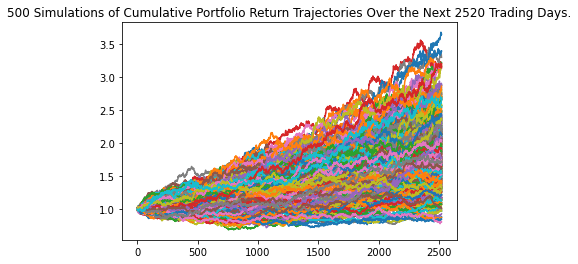

In [44]:
# Plot simulation outcomes
line_plot_ten = MC_even_dist_ten.plot_simulation()

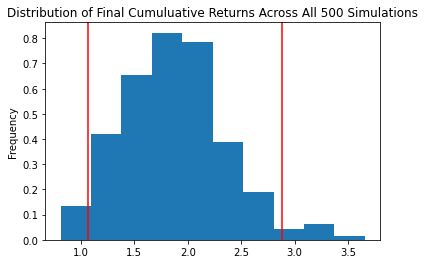

In [45]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_even_dist_ten.plot_distribution()

In [46]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_ten)

count           500.000000
mean              1.866430
std               0.480990
min               0.809778
25%               1.527962
50%               1.848834
75%               2.164633
max               3.655691
95% CI Lower      1.066575
95% CI Upper      2.878409
Name: 2520, dtype: float64


In [47]:
# Set initial investment

initial_investment = 60000

ci_lower_ten = round(even_tbl[8]*60000,2)
ci_upper_ten = round(even_tbl[9]*60000,2)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $140546.24 and $819564.76
